# Introduction

Hello, in this brief tutorial we are going to go through a simple example involving K-Nearest Neighbor Classification (KNN).

## Import Libraries

We will begin by importing the necessary libraries that will be used throughout the entire notebook.

In [1]:
from sklearn import datasets, neighbors, metrics # These libraries are the backbone of the model. This is where the KNN model, datasets, and metrics are imported from
from sklearn.model_selection import train_test_split # This library allows you to split the data so that you can effectively train the model
import pandas as pd # This library is used to create, organize, and manipulate dataframes with ease
import matplotlib.pyplot as plt # This library is used to create plots. This is not necessary for KNN

## Importing The Data

For this example, we are going to be using the iris dataset that comes with the sklearn package. This is a common starting point and a lot of tutorials make use of it due to its easy access.

In [2]:
iris = datasets.load_iris()

Running a simple print(len) command shows us that we have 150 values to work with in this dataset.

In [3]:
print(len(iris.data))

150


## Peeking into the Data

Now that the dataframe has been successfuly imported, we can take a quick peak and look at what exactly was imported. In this case, we are going to look at the feature names as well as the dat aassociated with it. Feature names represent the name of the features that each data corresponds with.

In [4]:
print(iris['feature_names'][0:5], iris['data'][0:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


We can also take a look at the target names. The target names can be thought as the outcomes, or the labels. In the case of this dataset, the target names represent the flowers. Of course, computers work a lot better with numbers so each label has an accompanying value which is mapped towards it.

- Setosa : 0
- Versicolor : 1
- Virginica = 2

In [5]:
print(iris['target_names'][0:5], iris['target'][0:5])

['setosa' 'versicolor' 'virginica'] [0 0 0 0 0]


## Splitting The Data

There are many tutorials that split the data but very few explain why. Ther reason for why I am splitting the data into two columns is simply due to visualization purposes. In the real world, splitting the data may not be optimal and may lead to a worse model. Splitting the data into two columns allows us to create an intuitive plot that would otherwise be impossible to display if more features were included. Another small detail to note is that we are creating a new variable, X, which will house the split data instead of replacing the original dataset.

In [6]:
X = iris.data[:, :2]

We can now run a simply print commmand to look at the new dataframe.

In [7]:
print(X[0:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [8]:
y = iris.target

Similar to what was done with the features, we are also going to place the target values into its own variable. This will make inputting variables into the model much easier down the road.

In [9]:
print(y[0:5])

[0 0 0 0 0]


## Creating a DataFrame

Using Pandas we can now create a dataframe for the split data. In the case of this tutorial, the dataframe is not used except to create a visualization but it is a good habit to know how to create dataframes using pandas as well as learning how to concatenate rows into existing dataframes. It is for that reason that I have decided to include this portion.

In [10]:
df = pd.DataFrame(X, columns = ['sepal length (cm)', 'sepal width (cm)'])
df['Target'] = y

In [11]:
df.head()

,sepal length (cm),sepal width (cm),Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


## Visualization

Visualizations and diagrams are always a great tool to have when trying to portray information. This is the reason for why we spliced the data into two columns earlier. If we had three features, this plot would be three dimensional, if we had four or more, it would be impossible to easily visualize it. There will be times where creating a visualization will not be possible due to the dimensions that are being worked with, in this case however, we don't have to worry about that issue.

Visualizations are also a good tool to help us understand the data a bit better. If we take a look at the graph that was created down below, we can notice that the setosas seem to be more isolated when compared to the virginica's and the versicolor's. This characteristic is very difficult to notice just by looking at the dataframe values.

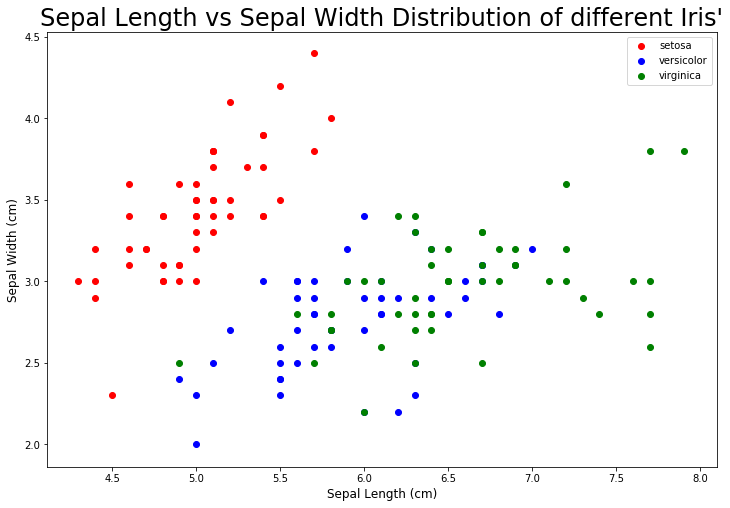

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

setosa_label = False
versicolor_label = False
virginica_label = False

for i in df.iterrows():
    if i[1]['Target'] == 0.0:
        if setosa_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'setosa')
            setosa_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    elif i[1]['Target'] == 1.0:
        if versicolor_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'versicolor')
            versicolor_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')
    else:
        if virginica_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green', label = 'virginica')
            virginica_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'green')
plt.xlabel('Sepal Length (cm)', size = 12)
plt.ylabel('Sepal Width (cm)', size = 12)
plt.title('Sepal Length vs Sepal Width Distribution of different Iris\'', size = 24)
plt.legend()

## 80/20 Split

It is possible that we import our entire dataset into the model. After all, the more data we have to work with, the better the model. However, if we were to do that, there would be no way to determine if our model is good without the inclusion of outside data. It is for that reason that it is common to split the data into different categories: Training Data and Testing Data. The 80/20 split is a common way to split the data by using 80% of the dataset to train the model and using the remaining 20% of the dataset to test the model.

We can easily split the data using the following code.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Now if we run a print(len) command we can see that the training data now only has 120 values as opposed to the original 150. The remaing 30 values will be used to test our model.

In [14]:
print(len(X_train))
print(len(X_test))

120
30


## KNN

It is now time to create the KNN model. To begin we will create a simple variable entitled K. This is going to be the number of neighbors that the model is going to identify before coming up with a classification result. 

In [15]:
K = 11

To create the model we simply run the following lines of code:

In [16]:
model = neighbors.KNeighborsClassifier(K) # Creating the KNN model

In [17]:
model.fit(X_train, y_train) # Training the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [18]:
prediction = model.predict(X_test) # Testing the model

And that's it! We have created and trained a simple KNN model using Python. If we want to see how well our model performed then we can take a look at the metrics using the metrics library we imported at the beginning 

In [19]:
print('Accuracy: ', metrics.accuracy_score(y_test, prediction))

Accuracy:  0.7666666666666667


# Conclusion

Our model got an accuracy of around 76.6%. Not terrible but definitely not great either. Typically we would like to see accuracy scores in the high 90s but this is a good starting point. Ways to improve this score is by using more data. We only trained this model with 120 values and two features. In the real world, there may be hundreds of thousands of values to work with spanning across multiple dimensions. When working with datasets that lrage, the theory is the same.

Another way to improve your accuracy is by changing the K value. To find the ideal K-value, it is common to use the square root of the number of data you have. In this case the square root of 120 is around 11. But feel free to mess with the numbers and use other machine learning concepts such as cross-validation to help find the best value.